# Ford GoBike System Data Exploration
## by Williams Emmanuel

## Introduction
The purpose of this document is to explore various variables that contribute to the Ford GoBike System and find key elements in determining its current customer layout as well as trends.
The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area within the months of February & March.

## Questions for Analysis:

### Question 1:
##### Does bike usage in terms of ride duration and frequent use depend on the user type?

### Question 2:
##### When are the most frequent use of the bikes in terms of periods/days ?

### Question 3:
##### Does age play a factor in the duration & frequent use of the bikes?






## Preliminary Wrangling


- The first step would be to import all necessary packages to clean the data and plot the data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- The next step would be to load in the data provided


In [2]:
# load in the dataset into a pandas dataframe, print statistics
tripdata=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Showcase an overview of the dataset
print(tripdata.shape)
print(tripdata.dtypes)
print(tripdata.head())

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
#descriptive statistics for numeric variables
print(tripdata.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

### What is the structure of your dataset?
There are 183412 recorded rides in the dataset with 16 features/columns. There is only one int column the rest are evenly split between object values and float values. The features include:
- duration_sec                 
- start_time                  
- end_time                    
- start_station_id           
- start_station_name          
- start_station_latitude     
- start_station_longitude    
- end_station_id             
- end_station_name            
- end_station_latitude       
- end_station_longitude      
- bike_id                      
- user_type                   
- member_birth_year          
- member_gender               
- bike_share_for_all_trip     

### What is/are the main feature(s) of interest in your dataset?

The main features would include duration of each ride and the user type  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Member birth year could suport in determining the average age for members, Which station gets the most riders, The start time to find out which period of the day has the most rides as well.

#### The cleaning process of the dataset starts from here.
Adjustments would be made to the dataframe as a whole, so a copy of the original dataset would be made for these changes

In [3]:
# A copy of the dataset was made to avoid making any changes to the original
trip_copy=tripdata.copy()
trip_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### This section focuses on the various changes:
- Creating a new column and converting the ride duration from seconds to minutes
- Converting the duration_min data type from float to int
- Converting the columns (start_time) & (end_time) to datetime type
- Dropping/removing the duration_sec column

In [4]:
trip_copy['duration_min']=trip_copy['duration_sec']/60
trip_copy["start_time"] = pd.to_datetime(trip_copy["start_time"])
trip_copy["end_time"] = pd.to_datetime(trip_copy["end_time"])
trip_copy['duration_min']=trip_copy['duration_min'].astype(int)
trip_copy=trip_copy.drop(['duration_sec'], axis=1)


trip_copy.info()
trip_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_min               183412 non-null int64
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26


- This next section would be checking for any null values

In [7]:
print(trip_copy.isnull().sum())

start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_min                  0
dtype: int64


#### This section focuses on the various changes:
- This drops various rows that have Nan/ Missing values
- Converting Member_birth_year to int data type

In [5]:
trip_copy=trip_copy.dropna(subset=['start_station_id','start_station_name','end_station_id','end_station_name'])
trip_copy=trip_copy.dropna(subset=['member_birth_year','member_gender'])
trip_copy['member_birth_year']=trip_copy['member_birth_year'].astype(int)

trip_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_min               174952 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(3), object(5)
memory usag

#### This section focuses on the various changes:
- Creating a new column for the age of the various user types
- Creating a new column for the day of week in which the ride took place

In [9]:
trip_copy['Age']=pd.DatetimeIndex(trip_copy['start_time']).year-trip_copy['member_birth_year']
trip_copy['day']=trip_copy['start_time'].dt.day_name()
trip_copy['day'].value_counts()
trip_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_min               174952 non-null int64
period                     174952 non-null object
Age                 

- This next part is creating another column for the period of day (Morning, Afternoon, Night) in which the ride takes place


In [6]:
# Period of day from Morning to Night
trip_copy['period'] = (trip_copy['start_time'].dt.hour % 24 + 4) // 4
trip_copy['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
trip_copy.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,period
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869,Evening
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030,Noon
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608,Evening
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26,Night
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29,Night


 #### N.B
 - At this point a seperate copy of the adjusted dataframe was created and used for the slides presentation in Part II **(trip_copy.csv)**

In [11]:
trip_copy.describe()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,Age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,11.241461,34.196865
std,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,27.371269,10.118731
min,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.000000,18.000000
25%,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,5.000000,27.000000
50%,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,8.000000,32.000000
75%,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,13.000000,39.000000
max,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1409.000000,141.000000


In [47]:
# This Function creates the labels for the plots to come
def labels(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    

## Univariate Exploration

>In this section the main and first variable to be looked it is the comparison between user types. Other variables include Stations used, Age range, Bike ride count e.t.c. 
 
>- First we'll be looking at the Total percentage between Customer & User types.

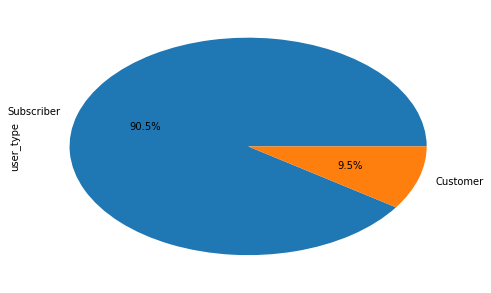

In [12]:
#This pie chart shows the percentage difference between user_types(Customer & Subscriber)
plt.figure(figsize=[8,5])
trip_copy['user_type'].value_counts().plot(kind='pie',autopct='%1.1f%%');

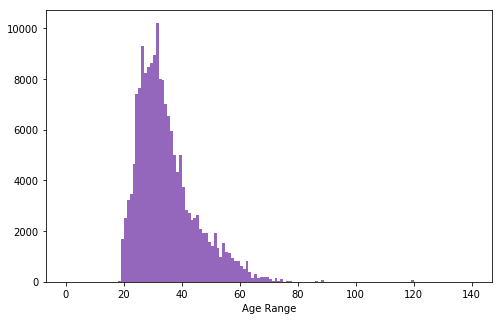

In [10]:
# This shows the age distribution for the riders
plt.figure(figsize=[8,5])
bins= np.arange(0,trip_copy['Age'].max())
base_color = sns.color_palette()[4]
plt.hist(data=trip_copy,x='Age',bins=bins,color=base_color)
plt.xlabel('Age Range');

It can be seen that the most frequent age for the riders is between age 25-35 years. Middle aged people tend to use this service alot more. There are outliers especially those aged over 90.

- Next up would be looking at total bike usage per day across the whole week

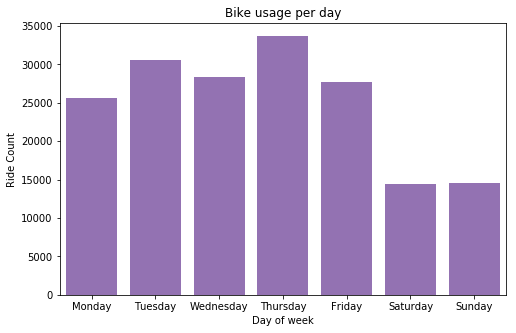

In [25]:
# This bar chart shows the count of bike rides per day across the week
weekdays = ['Monday','Tuesday','Wednesday','Thursday',
            'Friday','Saturday','Sunday']

plt.figure(figsize=[8,5])
base_color = sns.color_palette()[4]
sns.countplot(data=trip_copy,x='day',color=base_color,order=weekdays)
labels('Day of week','Ride Count','Bike usage per day');

- Next would be looking at the top 5 most frequently used stations when starting a bike ride.

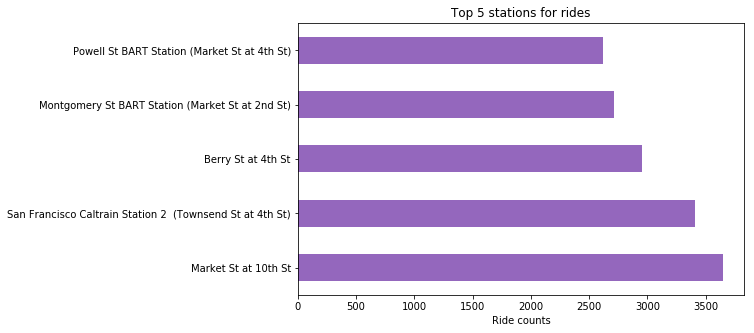

In [15]:
#Top 5 most used staions
plt.figure(figsize=[8,5])
base_color = sns.color_palette()[4]
plt.title('Top 5 stations for rides')
plt.xlabel('Ride counts')
trip_copy['start_station_name'].value_counts()[:5].plot(kind='barh',color=base_color);

- Next would be looking at the gender type count among the users

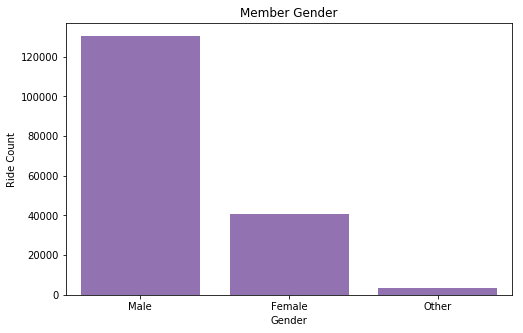

In [12]:
# This plot shows which the gender count among the users.
freq = trip_copy['member_gender'].value_counts()
gen_order = freq.index

plt.figure(figsize=[8,5])
base_color = sns.color_palette()[4]
sns.countplot(data=trip_copy,x='member_gender',order=gen_order,color=base_color)
labels('Gender','Ride Count','Member Gender');

- The next plot shows a pie chart which dsiplays the percentage of members who have opted for the bike share for all and those who haven't

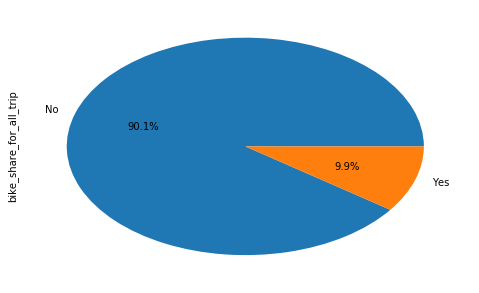

In [17]:
#This pie chart shows the percentage difference between riders who opt for the bike share for all
plt.figure(figsize=[8,5])
trip_copy['bike_share_for_all_trip'].value_counts().plot(kind='pie',autopct='%1.1f%%');

- Next the plot shows which period of the day has the most riders, whether it be morning, afternoon or night

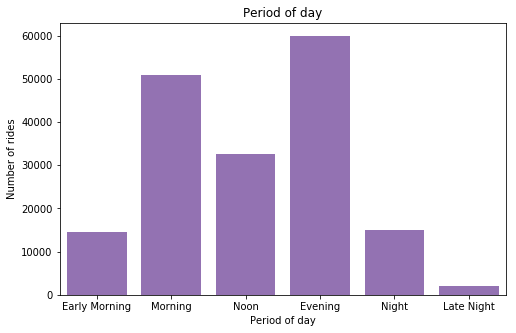

In [41]:
# Ride count at each period of the day

period=['Early Morning','Morning','Noon','Evening','Night','Late Night']

plt.figure(figsize=[8,5])
base_color = sns.color_palette()[4]
sns.countplot(data=trip_copy,x='period',order=period,color=base_color)
labels('Period of day','Number of rides','Period of day');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- The main variables of interest were the duration_sec & the user_type. The duration_sec column was the ride duration in seconds therefore a new column was made to convert the ride duration from seconds to minutes. 

- The user type had no changes made

#### N.B:
Null values had to be removed in the cleaning process to calculate and create new columns

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The features that were investigated required some additions especially to the start_time. This had to be converted to a datetime type and a few calculations were made to get the specific period of day

- The member birth year was used to create another column to determine the age of the bike user.This was presented as a float which was then changed to int type. In doing this the Age variable showed a very wide outlier where a few of the riders were above 90 years of age with the max reaching over 140 years of age.

- Also using the start_time column, the day of week as well as the period of day was gotten from this single column. The day of week was initially presented as numeric values but was converted into the actual day of the week.



## Bivariate Exploration
>To begin this exploration, a reminder of all columns available:

In [19]:
trip_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_min               174952 non-null int64
Age                        174952 non-null int64
day                  

#### The next batch of plots would compare two feautures of the data

- This plot presents the correlation between the days of the week and  total the ride duration.

day
Monday       285256
Tuesday      317731
Wednesday    301134
Thursday     364544
Friday       300503
Saturday     197071
Sunday       200477
Name: duration_min, dtype: int64


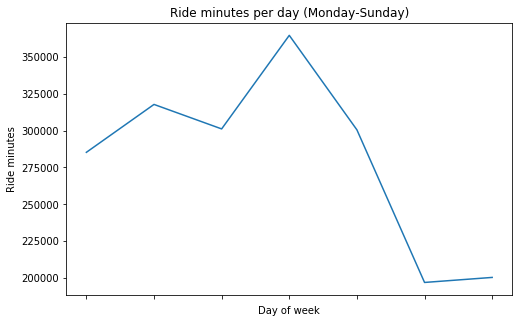

In [52]:
# This is the total ride duration in minutes per day of week
plt.figure(figsize=[8,5])
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

labels_ = ['{}'.format(val) for val in cats]

trip_copy.groupby('day')['duration_min'].sum().reindex(cats).plot()
labels('Day of week','Ride minutes','Ride minutes per day (Monday-Sunday)')

print(trip_copy.groupby('day')['duration_min'].sum().reindex(cats))


- This plot presents the correlation count between the bike user types and the various genders.

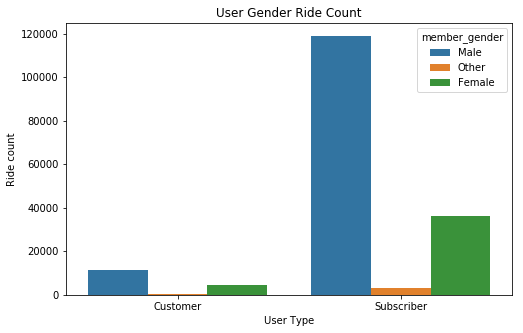

In [36]:
plt.figure(figsize=[8,5])
sns.countplot(data = trip_copy, x = 'user_type', hue = 'member_gender')
labels('User Type','Ride count','User Gender Ride Count');

It is shown that for both customer & Subscribers, there is a significant amount of male users compared to female users. 

- This next plot shows the correlation between user-types and the period of the day in which they start their bike trips

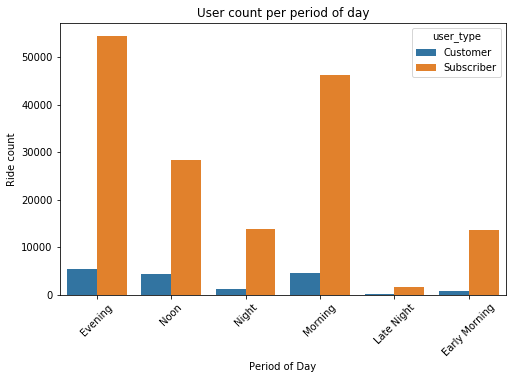

In [37]:
plt.figure(figsize=[8,5])

sns.countplot(data = trip_copy, x = 'period', hue = 'user_type')
labels('Period of Day','Ride count','User count per period of day')
plt.xticks(rotation=45);

While it is clear that there a far more Subscribers than customers, This plot shows that bike rides peak between Morning and Evening Periods.

- This next plot shows the correlation between the Genders and the period of the day in which they start their bike trips

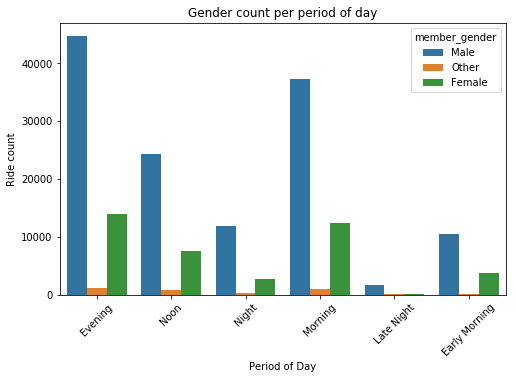

In [34]:
plt.figure(figsize=[8,5])

sns.countplot(data = trip_copy, x = 'period', hue = 'member_gender')
labels('Period of Day','Ride count','Gender count per period of day')
plt.xticks(rotation=45);

- This next plot shows the correlation between the period of the day in which they start their bike trips and the Age range of the riders

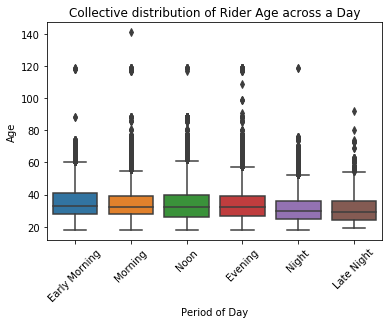

In [8]:
period=['Early Morning','Morning','Noon','Evening','Night','Late Night']

sns.boxplot(data=trip_copy, x='period', y='Age',order=period)
plt.title('Collective distribution of Rider Age across a Day')
plt.xlabel('Period of Day')
plt.xticks(rotation=45);

Looking at the box plot the average age range across the various periods of the day is about 30 years of age. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- Duration of ride minutes to Day of the week:
  Accross the week it looked as though weekdays had high turnout for ride duration with the higest being on thursday

- User_type & Member_gender: 
  It is shown that for both Customer & Subscribers, there is a significant amount of male users compared to female users. 

- 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Correlation between period of day and Age:
   Using a Boxplot it show the distribution of the age range across the various periods of the day. As can be seen across all periods the major density of each lies within the ages of 25-40 years of age.
 
- Period of Day & Member gender:
  Like the first point most rides are taken in the morning & evening periods

## Multivariate Exploration

> To Begin, again we remind ourselves ov the carious columns that can be used.

In [31]:
# Quick reminder of all the available columns that can be used for plotting
trip_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_min               174952 non-null int64
Age                        174952 non-null int64
day                  

- First, this is the comparison between User types in terms of their Age and Ride Duration across varios periods of the day

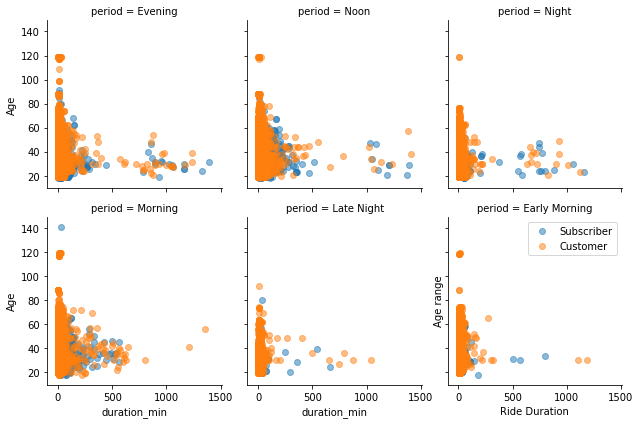

In [54]:
#This is the comparison between User types in terms of their Age and Ride Duration across varios periods of the day
plt.figure(figsize=[8,8])
g= sns.FacetGrid(data = trip_copy, col='period', hue = 'user_type',col_wrap=3)
g.map(plt.scatter, 'duration_min', 'Age',alpha=0.5);
plt.xlabel('Ride Duration')
plt.ylabel('Age range')
plt.legend(['Subscriber','Customer'])
plt.show();


- Next we have the multiple plots based on Gender, Using the ride duration minutes and Age range

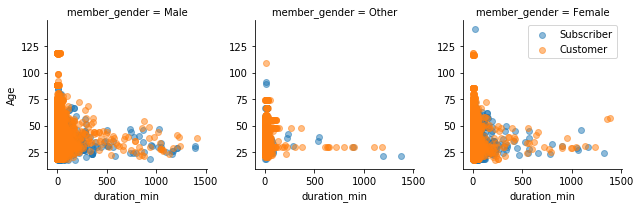

In [12]:
#This is the comparison between User types in terms of their Age and Ride Duration across the varios Gender types
plt.figure(figsize=[8,8])
g= sns.FacetGrid(data = trip_copy, col='member_gender', hue = 'user_type')
g.map(plt.scatter, 'duration_min', 'Age',alpha=0.5)
plt.legend(['Subscriber','Customer']);

- Lastly making a scatterplot comparing the ride duration with the Age range across each day in the week.

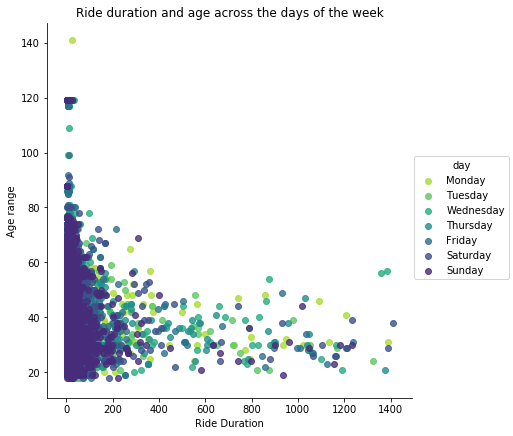

In [42]:
#This highlights the various days of the week when comparing the user types, the ride duration and their age
weekdays = ['Monday','Tuesday','Wednesday','Thursday',
            'Friday','Saturday','Sunday']
g= sns.FacetGrid(data = trip_copy, hue = 'day',palette='viridis_r',size=6,hue_order=weekdays)
g.map(sns.regplot, 'duration_min', 'Age',x_jitter=0.1,fit_reg= False)
g.add_legend()
labels('Ride Duration','Age range','Ride duration and age across the days of the week');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The most common feature used among all the plots is the duration of ride minutes and what's common is that subscribers spend less time in time of ride minutes compared. 
 Also the Age range shows a big points cluster between 20-45 years.


## Questions for Analysis:

### Question 1:
##### Does bike usage in terms of ride duration and frequent use depend on the user type?
Yes it does depend on user type as over 90% of bike rides are done through the subscribers.

### Question 2:
##### When are the most frequent use of the bikes in terms of periods/days ?
The most frequent bike usage takes place during weekdays especially on Thurdays, between Morning and Evening periods.

### Question 3:
##### Does age play a factor in the duration & frequent use of the bikes?
With a few outliers in age reaching over 90years, most riders are within 30-40 years of age. Middle aged riders so to speak.


## Conclusions
In conclusion for the month of February in which this analysis was drawn from:
- Riders prefer Morning and evening period
- The most frequent riders are mostly middle-aged, from 30 years upward.
- Customers tend to spend far more time using the bikes per trip compared to Subscribers

### Recommendations:
- I would recommend having an additional dataset for a few months to compare and have more variables to use as weather,temperatures and seasons could play a part. 
- Another thing to point out is if there are different bike types, maybe electrical perhaps?